In [5]:
from google.colab import files
uploaded = files.upload()


Saving Retail_Transaction_Dataset.csv to Retail_Transaction_Dataset.csv


In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Handle missing values
df.dropna(inplace=True)

# Check dataset summary
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   CustomerID          100000 non-null  int64         
 1   ProductID           100000 non-null  object        
 2   Quantity            100000 non-null  int64         
 3   Price               100000 non-null  float64       
 4   TransactionDate     100000 non-null  datetime64[ns]
 5   PaymentMethod       100000 non-null  object        
 6   StoreLocation       100000 non-null  object        
 7   ProductCategory     100000 non-null  object        
 8   DiscountApplied(%)  100000 non-null  float64       
 9   TotalAmount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB
None
          CustomerID       Quantity          Price  \
count  100000.000000  100000.000000  100000.000000   
mean   50046

In [7]:
# Assume Cost Price is 70% of Price
df['EstimatedCost'] = df['Price'] * 0.70

# Estimated Revenue per unit = Price - Cost
df['EstimatedProfitPerUnit'] = df['Price'] - df['EstimatedCost']

# Total Estimated Profit
df['EstimatedProfit'] = df['EstimatedProfitPerUnit'] * df['Quantity']


In [10]:
import sqlite3

# Create SQLite DB in memory or file
conn = sqlite3.connect("retail.db")

# Save your DataFrame to a SQL table
df.to_sql("retail_data", conn, if_exists="replace", index=False)

# Example SQL query
query = """
SELECT ProductCategory, SUM(TotalAmount) AS TotalSales
FROM retail_data
GROUP BY ProductCategory
"""
result = pd.read_sql(query, conn)
print(result)


  ProductCategory    TotalSales
0           Books  6.257837e+06
1        Clothing  6.205502e+06
2     Electronics  6.196735e+06
3      Home Decor  6.173421e+06


In [12]:
query = """
SELECT
  ProductCategory,
  SUM(TotalAmount) AS TotalSales,
  SUM(EstimatedProfit) AS TotalProfit,
  ROUND(SUM(EstimatedProfit) * 100.0 / SUM(TotalAmount), 2) AS ProfitMargin
FROM retail_data
GROUP BY ProductCategory
ORDER BY ProfitMargin ASC;
"""

result = pd.read_sql(query, conn)
print(result)


  ProductCategory    TotalSales   TotalProfit  ProfitMargin
0     Electronics  6.196735e+06  2.064804e+06         33.32
1           Books  6.257837e+06  2.086543e+06         33.34
2        Clothing  6.205502e+06  2.069137e+06         33.34
3      Home Decor  6.173421e+06  2.058556e+06         33.35


In [13]:
query ="""
SELECT
  strftime('%Y-%m', TransactionDate) AS Month,
  ProductCategory,
  SUM(TotalAmount) AS MonthlySales
FROM retail_data
GROUP BY Month, ProductCategory
ORDER BY Month;
"""
result=pd.read_sql(query,conn)
print(result)

      Month ProductCategory   MonthlySales
0   2023-04           Books   17717.504483
1   2023-04        Clothing   14806.915405
2   2023-04     Electronics   15771.333430
3   2023-04      Home Decor   12545.034536
4   2023-05           Books  529892.544300
5   2023-05        Clothing  522438.714397
6   2023-05     Electronics  535326.863055
7   2023-05      Home Decor  511917.979083
8   2023-06           Books  526911.648142
9   2023-06        Clothing  516732.627192
10  2023-06     Electronics  512140.051570
11  2023-06      Home Decor  510580.496411
12  2023-07           Books  546430.914235
13  2023-07        Clothing  521163.701023
14  2023-07     Electronics  519402.099385
15  2023-07      Home Decor  545553.803106
16  2023-08           Books  544896.224773
17  2023-08        Clothing  542699.666700
18  2023-08     Electronics  521367.592568
19  2023-08      Home Decor  500389.162005
20  2023-09           Books  503236.398162
21  2023-09        Clothing  517822.839342
22  2023-09

                   AvgInventoryValue  EstimatedProfit
AvgInventoryValue                1.0              1.0
EstimatedProfit                  1.0              1.0


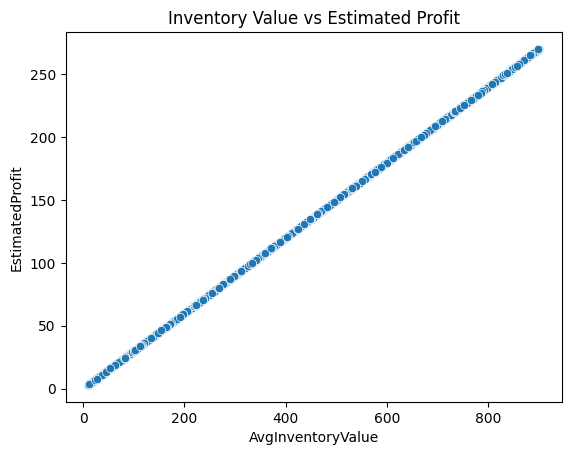

In [14]:
# Approximate Average Inventory Value per product
df['AvgInventoryValue'] = df['Price'] * df['Quantity']

# Correlation
print(df[['AvgInventoryValue', 'EstimatedProfit']].corr())

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='AvgInventoryValue', y='EstimatedProfit')
plt.title("Inventory Value vs Estimated Profit")
plt.show()


In [16]:
print(df.columns)


Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount', 'EstimatedCost',
       'EstimatedProfitPerUnit', 'EstimatedProfit', 'AvgInventoryValue'],
      dtype='object')


In [18]:
df['Profit_Margin'] = df['EstimatedProfit'].astype(float) / df['TotalAmount'].astype(float)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Create Season column
df['Season'] = df['TransactionDate'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_map)

# Export cleaned file
df.to_csv('Cleaned_Retail_Data.csv', index=False)

from google.colab import files
files.download('Cleaned_Retail_Data.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>